# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [1]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [2]:
#Cargamos dataset a utilizar
df_car_evaluation  = pd.read_csv('car_evaluation.csv',header=None)

## Análisis exploratorio de datos

In [3]:
#Visualizacion del dataframe
df_car_evaluation.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
#Analizamos el shape del objetod
print(df_car_evaluation.shape)

(1728, 7)


In [5]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df_car_evaluation.columns = col_names

In [6]:
#Vericamos la transformacion
df_car_evaluation.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


Recordar que:

-  La variable **lug_boot**: tamaño de la caja de equipaje (luggage boot)
-  Las clases de **class** son:
- unacc: unnaceptable o inaceptable
- acc: Acceptable o aceptable
- good: bueno
- vgood: muy bueno


In [7]:
#Visualizamos los tipos de datos
df_car_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df_car_evaluation.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [9]:
# Exploremos un poco mas la variable target
df_car_evaluation['class'].value_counts() # Conteo de las cantidades de cada categoria 

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [10]:
#Verificamos valores missings
df_car_evaluation.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [11]:
#Separamos en X e y
X = df_car_evaluation.drop('class',axis=1)
y = df_car_evaluation['class']

In [12]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
#Veamos que obtuvimos
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [14]:
y_train.shape, y_test.shape

((1209,), (519,))

In [15]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head(10)

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med
888,med,vhigh,2,more,big,low
1001,med,high,3,2,small,high
327,vhigh,low,2,2,med,low
879,med,vhigh,2,4,big,low
1217,med,low,3,2,small,high


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1209 entries, 1178 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1209 non-null   object
 1   maint     1209 non-null   object
 2   doors     1209 non-null   object
 3   persons   1209 non-null   object
 4   lug_boot  1209 non-null   object
 5   safety    1209 non-null   object
dtypes: object(6)
memory usage: 66.1+ KB


## Entrenamiento de modelo de clasificación con árbol de decisión

In [17]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = X.columns)

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [18]:
#Verificamos la transformacion
X_train.head(10)

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3
888,1,3,4,2,1,2
1001,1,2,2,3,2,1
327,4,4,4,3,3,2
879,1,3,4,1,1,2
1217,1,4,2,3,2,1


In [19]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier
#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2,random_state=0)

In [20]:
#Entrenamiento
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [21]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree= tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

## Evaluación de modelo de clasificación con árbol de decisión

Recordar que:

<img src='true_positive.PNG'>

In [22]:
#Calculo de metricas 

from sklearn import metrics
#Calculo el accuracy en Train
print(f'El accuracy o exactitud del modelo en el entrenamiento es de {metrics.accuracy_score(y_train, y_train_pred_tree)}')

#Calculo el accuracy en Test

print(f'El accuracy o exactitud del modelo en el test es de {metrics.accuracy_score(y_test, y_test_pred_tree)}')


El accuracy o exactitud del modelo en el entrenamiento es de 0.7733664185277088
El accuracy o exactitud del modelo en el test es de 0.626204238921002


In [23]:
print(metrics.f1_score(y_train, y_train_pred_tree,average='micro'))
print(metrics.f1_score(y_test, y_test_pred_tree,average='micro'))

0.7733664185277088
0.626204238921002


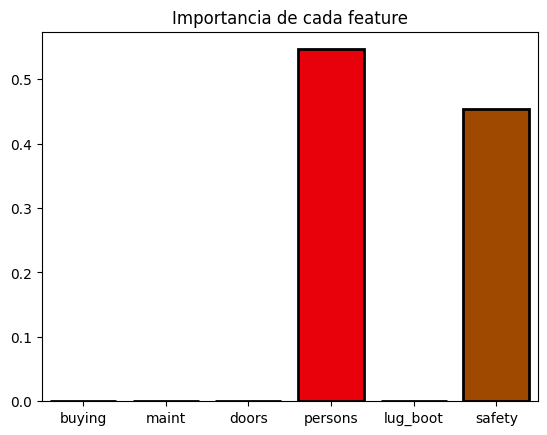

In [24]:
#Verificamos el feature importances
importances = tree.feature_importances_
columns = X.columns

data = pd.DataFrame(
    [importances],
    columns = columns
)

sns.barplot(
    data,
    palette='bright',
    saturation= 2.0,
    edgecolor = 'black',
    linewidth= 2.0
)
plt.title('Importancia de cada feature')
plt.show()

Se puede observar que segun el modelo, las variables que más aportan a la clasifiación son **persons** y **safety**, las otras variables no están aportando lo suficiente, por lo cual se puede evaluar otro modelo en el que se usen sólo aquellas variables.

In [25]:
X_red = X.drop(['buying','maint','doors','lug_boot'],axis = 1)
y_red = y.copy(deep=True)

In [26]:
tree_red = DecisionTreeClassifier(max_depth=3,random_state=42)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)

In [27]:
encoder_red = ce.OrdinalEncoder(cols = X_red.columns)
X_train_red = encoder_red.fit_transform(X_train_red)
X_test_red = encoder_red.fit_transform(X_test_red)
tree_red.fit(X_train_red, y_train_red)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [28]:
y_train_red_pred_tree = tree_red.predict(X_train_red)
y_test_red_pred_tree = tree_red.predict(X_test_red)

In [29]:
print(f'El accuracy o exactitud del modelo en el entrenamiento es de {metrics.accuracy_score(y_train_red, y_train_red_pred_tree)}')
print(f'El accuracy o exactitud del modelo en el test es de {metrics.accuracy_score(y_test_red, y_test_red_pred_tree)}')

El accuracy o exactitud del modelo en el entrenamiento es de 0.7733664185277088
El accuracy o exactitud del modelo en el test es de 0.626204238921002


## Entrenamiento de modelo de clasificación con random forest

In [30]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10, n_jobs= -1,random_state=00000)

In [31]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=0)

In [32]:
#Calculo de las predicciones en Train y Test
y_train_pred_randomforest = random_forest.predict(X_train)
y_test_pred_randomforest = random_forest.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [33]:
#Calculo de metricas 


#Calculo el accuracy en Train

print(f'El accuracy o exactitud del modelo en el entrenamiento es de {metrics.accuracy_score(y_train, y_train_pred_randomforest)}')

#Calculo el accuracy en Test
print(f'El accuracy o exactitud del modelo en el test es de {metrics.accuracy_score(y_test, y_test_pred_randomforest)}')

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

El accuracy o exactitud del modelo en el entrenamiento es de 0.9942100909842845
El accuracy o exactitud del modelo en el test es de 0.5202312138728323


In [42]:
# Visualizacion de las feature importantes
features_scores = pd.Series(random_forest.feature_importances_, index = X.columns).sort_values(ascending=False)
features_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

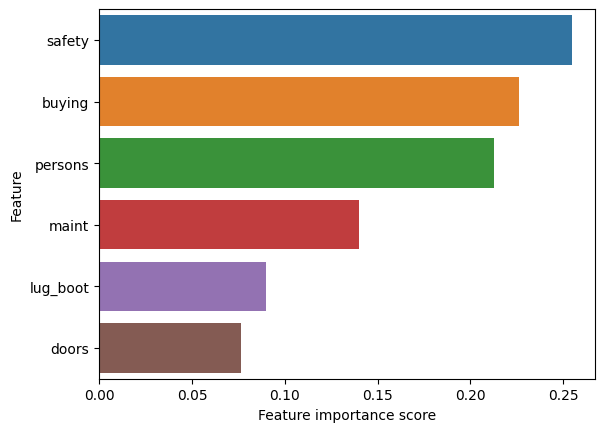

In [51]:
#Grafico de barras
sns.barplot(
    x=features_scores,
    y=features_scores.index
)
plt.xlabel('Feature importance score')
plt.ylabel('Feature')
plt.show()

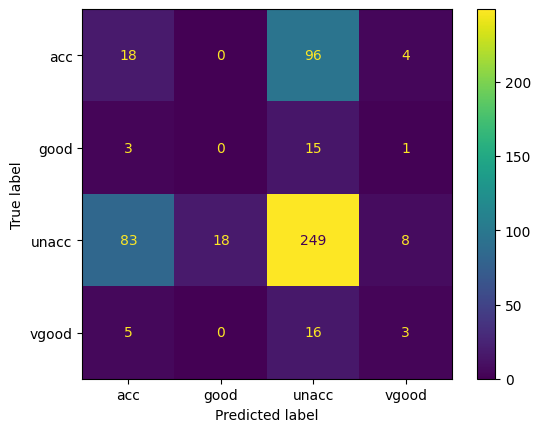

In [56]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred_randomforest,labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
disp.plot()
plt.show()

In [58]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_randomforest))


              precision    recall  f1-score   support

         acc       0.17      0.15      0.16       118
        good       0.00      0.00      0.00        19
       unacc       0.66      0.70      0.68       358
       vgood       0.19      0.12      0.15        24

    accuracy                           0.52       519
   macro avg       0.25      0.24      0.25       519
weighted avg       0.50      0.52      0.51       519

